<a href="https://colab.research.google.com/github/rutia2044/rutiarbiv-gmail.com/blob/master/try2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
 
import torchvision.transforms as transforms
from torchvision.utils import make_grid
 
from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable
 
import torch.nn as nn
import torch.nn.functional as F
import torch
 
import os
import glob
 
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import warnings
from tensorflow import keras,summary


In [ ]:
#import numpy as np
#import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from keras.applications.vgg16 import VGG16

#from keras import models, layers,applications


In [ ]:
images = []
root = '/content/drive/MyDrive/gan-getting-started/monet_jpg'
for file in tqdm(os.listdir(root)):
    images.append(plt.imread(root+'/'+file))
images = np.array(images)

100%|██████████| 300/300 [00:00<00:00, 413.26it/s]


In [ ]:
images = images/255

In [ ]:
print(images[0][0][0][0])

0.6980392156862745


In [ ]:

#Encoder

EncoderBaseModel = VGG16(include_top=False,input_shape=(256, 256, 3),weights='imagenet')
EncoderBaseModel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [ ]:
ImgPred = EncoderBaseModel.predict(images)
ImgPred.shape

(300, 8, 8, 512)

In [ ]:
from sklearn.manifold import TSNE

#tsneAllImages = TSNE(n_components=700).fit_transform( ImgPred.reshape(300,-1))
tsneAllImages = TSNE(n_components=700,method='exact').fit_transform( ImgPred.reshape(300,-1))
print(tsneAllImages.shape)

(300, 700)


In [ ]:

# save numpy array as csv file
#from numpy import asarray
from numpy import savetxt
# define data
#data = asarray([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
# save to csv file
savetxt('VGG_TSNE.csv', tsneAllImages, delimiter=',')

In [ ]:

# load numpy array from csv file
from numpy import loadtxt
# load array
tsneAllImages = loadtxt('VGG_TSNE.csv', delimiter=',')
# print the array
print(tsneAllImages)

In [ ]:
v1=ImgPred[0:30,:,:,:]
v2=ImgPred[30:60,:,:,:]
v3=ImgPred[30:60,:,:,:]
v4=ImgPred[30:60,:,:,:]
v5=ImgPred[30:60,:,:,:]
v1.shape

(30, 8, 8, 512)

FID

In [ ]:
# example of calculating the frechet inception distance
import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy.random import random
from scipy.linalg import sqrtm
 
# calculate frechet inception distance
def calculate_fid(act1, act2):
	# calculate mean and covariance statistics
	mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
	mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
	# calculate sum squared difference between means
	ssdiff = numpy.sum((mu1 - mu2)**2.0)
	# calculate sqrt of product between cov
	covmean = sqrtm(sigma1.dot(sigma2))
	# check and correct imaginary numbers from sqrt
	if iscomplexobj(covmean):
		covmean = covmean.real
	# calculate score
	fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
	return fid
 


In [ ]:
# define two collections of activations
act1 = random(30*7000)
act1 = act1.reshape((30,7000))
act2 = random(30*7000)
act2 = act2.reshape((30,7000))
# fid between act1 and act1
fid = calculate_fid(act1, act1)
print('FID (same): %.3f' % fid)
# fid between act1 and act2
fid = calculate_fid(act1, act2)
print('FID (different): %.3f' % fid)

FID (same): -0.001
FID (different): 1142.155


In [ ]:
from sklearn.manifold import TSNE

#tsneAllImages = TSNE(n_components=700,method='exact').fit_transform( ImgPred.reshape(300,-1))
tsneAllImages = TSNE(n_components=7000,method='exact').fit_transform( ImgPred.reshape(300,-1))
print(tsneAllImages.shape)


(300, 7000)


In [ ]:
print(tsneAllImages.shape)
tsneV1_Images=tsneAllImages[98:128,:]
tsneV2_Images=tsneAllImages[95:125,:]
selectTSNE=tsneAllImages[90:120,:]

print(tsneV1_Images.shape)
print(tsneV2_Images.shape)
print(selectTSNE.shape)

(300, 700)
(30, 700)
(30, 700)
(30, 700)


In [ ]:
tsneV1_Images = TSNE(n_components=700,method='exact').fit_transform( v1.reshape(30,-1))
#tsneV1_Images = TSNE(n_components=3).fit_transform( v1.reshape(30,-1))
print(tsneV1_Images.shape)
tsneV2_Images = TSNE(n_components=700,method='exact').fit_transform( v2.reshape(30,-1))
#tsneV2_Images = TSNE(n_components=3).fit_transform( v2.reshape(30,-1))
print(tsneV2_Images.shape)

In [ ]:
minIndexesFid=[ 79 ,233 ,252 ,271 , 33, 181, 162 ,142 , 38 ,288, 198 ,227 ,106, 176 ,288 ,163, 148, 282,
 230 ,127  , 4, 227 ,209 , 33 ,223 , 44 ,243, 222, 259 , 80]
aa=np.asarray(minIndexesFid)

In [ ]:
 TSNEminIndexesFid=tsneAllImages[aa,:]
fid = calculate_fid(tsneAllImages, TSNEminIndexesFid)
print('FID (different): %.3f' % fid)
print(TSNEminIndexesFid.shape)

FID (different): 122.463
(30, 700)


In [ ]:
fid = calculate_fid(tsneAllImages, tsneV1_Images)
print('FID (same): %.3f' % fid)

fid = calculate_fid(tsneAllImages, tsneV2_Images)
print('FID (different): %.3f' % fid)

fid = calculate_fid(tsneAllImages, selectTSNE)
print('FID (different): %.3f' % fid)

FID (same): 130.240
FID (different): 153.782
FID (different): 161.074


In [ ]:
#rand 100 vectors of 30 indexs
min=124
for number in range(1000):   
    rndArr=np.random.choice(300, 30)
    selectTSNE=tsneAllImages[rndArr,:]
    fid = calculate_fid(tsneAllImages, selectTSNE)   
    if fid < min:
       print('FID (different): %.3f' % fid)
       min=fid
       minIndx= rndArr
print('Min---FID (different): %.3f' % min)
print(minIndx)

FID (different): 121.143
FID (different): 119.423
FID (different): 117.635


In [ ]:


v1 = v1.reshape((30,32768))
v2 = v2.reshape((30,32768))
fid = calculate_fid(v1, v1)
print('FID (same): %.3f' % fid)

fid = calculate_fid(v1, v2)
print('FID (different): %.3f' % fid)

TSNE + CLUSTERING

In [ ]:
from sklearn.manifold import TSNE


tsneAllImages = TSNE(n_components=2).fit_transform( ImgPred.reshape(300,-1))
tsneAllImages.shape

(300, 2)

In [ ]:
from sklearn.cluster import KMeans
import collections

In [ ]:
kmeans = KMeans(n_clusters=30).fit(tsneAllImages)
collections.Counter(kmeans.labels_)

Counter({0: 1,
         1: 10,
         2: 21,
         3: 2,
         4: 1,
         5: 1,
         6: 83,
         7: 1,
         8: 1,
         9: 1,
         10: 1,
         11: 1,
         12: 1,
         13: 23,
         14: 1,
         15: 1,
         16: 1,
         17: 1,
         18: 1,
         19: 1,
         20: 16,
         21: 19,
         22: 30,
         23: 1,
         24: 1,
         25: 25,
         26: 21,
         27: 17,
         28: 1,
         29: 15})

In [ ]:
select=[]
for i in range (30):
  select.append(np.nonzero(kmeans.labels_ == i)[0][0])
select

[113,
 101,
 2,
 150,
 279,
 254,
 3,
 280,
 32,
 95,
 249,
 157,
 234,
 1,
 115,
 285,
 196,
 175,
 220,
 231,
 24,
 29,
 0,
 215,
 149,
 4,
 9,
 7,
 97,
 22]

In [ ]:
select

[113,
 101,
 2,
 150,
 279,
 254,
 3,
 280,
 32,
 95,
 249,
 157,
 234,
 1,
 115,
 285,
 196,
 175,
 220,
 231,
 24,
 29,
 0,
 215,
 149,
 4,
 9,
 7,
 97,
 22]

In [ ]:
tsneAllImages[select].shape

(30, 700)

In [14]:
#import numpy as np
#import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import numpy as np

In [62]:
images = []
root = '/content/drive/MyDrive/gan-getting-started/monet_jpg'
#root = 'sample_data/Monet'
for file in tqdm(os.listdir(root)):
    images.append(plt.imread(root+'/'+file))
images = np.array(images)


100%|██████████| 300/300 [00:00<00:00, 335.16it/s]


In [63]:
images = images.astype('float32')
print(images.shape)
print(images[0][0][0][0])

(300, 256, 256, 3)
178.0


In [68]:
v1=images[0:30,:,:,:]
v2=images[40:70,:,:,:]
print(images.shape)
print(v1[0][0][0][0])
print(v2[0][0][0][0])

(300, 256, 256, 3)
178.0
169.0


In [12]:
# example of calculating the frechet inception distance in Keras
import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import randint
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets.mnist import load_data
from skimage.transform import resize
 
# scale an array of images to a new size
def scale_images(images, new_shape):
	images_list = list()
	for image in images:
		# resize with nearest neighbor interpolation
		new_image = resize(image, new_shape, 0)
		# store
		images_list.append(new_image)
	return asarray(images_list)
 
# calculate frechet inception distance
def calculate_fid(model, act1, act2):
	# calculate activations

	# calculate mean and covariance statistics
	mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
	mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
	# calculate sum squared difference between means
	ssdiff = numpy.sum((mu1 - mu2)**2.0)
	# calculate sqrt of product between cov
	covmean = sqrtm(sigma1.dot(sigma2))
	# check and correct imaginary numbers from sqrt
	if iscomplexobj(covmean):
		covmean = covmean.real
	# calculate score
	fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
	return fid

In [70]:
images1 = preprocess_input(images.copy())
  
imagesV1 = preprocess_input(v1.copy())
imagesV2 = preprocess_input(v2.copy())
print(images1.shape)
print(images1[0][0][0][0])
print(imagesV1[0][0][0][0])
print(imagesV2[0][0][0][0])
# fid between images1 and images1
#act1 = model.predict(images1)




(300, 256, 256, 3)
0.39607847
0.39607847
0.32549024


In [75]:
images1 = preprocess_input(images.copy())
print(images1[0][0][0][0])

0.39607847


In [76]:

act1 = model.predict(images1)
print(act1.shape)


(300, 2048)


In [78]:
act2 = act1[0:30,]
act3 = act1[40:70,]
#print(mu1, sigma1)
fid = calculate_fid(model,act1,act2)
print('FID (v1): %.3f' % fid)
print(act1[0][0])
# fid between images1 and images2
fid = calculate_fid(model,act1,act3)
print('FID (v2): %.3f' % fid)
print(act1[0][0])

FID (v1): 200.744
0.38192022
FID (v2): 207.772
0.38192022


In [ ]:
 
# prepare the inception v3 model
#model = InceptionV3(include_top=False, pooling='avg', input_shape=(256,256,3))
# define two fake collections of images
#images1 = randint(0, 255, 10*32*32*3)
#images1 = images1.reshape((10,32,32,3))
##images2 = randint(0, 255, 10*32*32*3)
#images2 = images2.reshape((10,32,32,3))
#print('Prepared', images1.shape, images2.shape)
# convert integer to floating point values
#images1 = images.astype('float32')
#images2 = images.astype('float32')
# resize images
#images1 = scale_images(images1, (299,299,3))
#images2 = scale_images(images2, (299,299,3))
#print('Scaled', images1.shape, images2.shape)
# pre-process images
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)
# fid between images1 and images1
fid = calculate_fid(model, images1, images1)
print('FID (same): %.3f' % fid)
# fid between images1 and images2
fid = calculate_fid(model, images1, images2)
print('FID (different): %.3f' % fid)

In [20]:
model = InceptionV3(include_top=False, pooling='avg', input_shape=(256,256,3))


87924736/87910968 [==============================] - 1s 0us/step


(300, 2048)

In [ ]:
#rand 1000 vectors of 30 indexs
min=300
max=0

AllImages = preprocess_input(images)
for number in range(100):   
    rndArr=np.random.choice(300, 30)
    selectImg=images[rndArr,:,:,:]
    selectImg1 = preprocess_input(selectImg)
    fid = calculate_fid(model, AllImages, selectImg1)
    if fid < min:
       print('FID (temp min): %.3f' % fid)
       print(i)
       min=fid
       minIndx= rndArr
    if fid > max:
       print('FID (temp max): %.3f' % fid)
       print(i)
       max=fid
       maxIndx= rndArr
print('MIN Final---FID : %.3f' % min)
print(minIndx)
print('MAX Final---FID : %.3f' % max)
print(maxIndx)

FID (temp min): 217.818
FID (temp max): 217.818
FID (temp min): 208.034
FID (temp min): 201.899
FID (temp max): 229.195
FID (temp min): 201.761
FID (temp min): 201.072
FID (temp max): 231.111
FID (temp min): 200.004
FID (temp min): 197.385
FID (temp min): 194.471
FID (temp min): 193.589
FID (temp max): 231.899


In [11]:
t1=[113,101,2,150,279,254,3,280,32,95,249,157,234,1,115,285,196,175,220,231,24,29,0,215,149,4,9,7,97,22]
selectImg=images[t1,:,:,:]
print(selectImg.shape)
AllImages = preprocess_input(images)
selectImg1 = preprocess_input(selectImg)
fid = calculate_fid(model, images, selectImg1)
print('FID (temp min): %.3f' % fid)

(30, 256, 256, 3)
FID (temp min): 203.681


In [7]:
#import numpy as np
#import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import numpy as np

In [8]:
images = []
root = '/content/drive/MyDrive/gan-getting-started/monet_jpg'
#root = 'sample_data/Monet'
for file in tqdm(os.listdir(root)):
    images.append(plt.imread(root+'/'+file))
images = np.array(images)

100%|██████████| 300/300 [00:00<00:00, 469.33it/s]


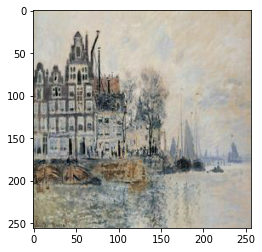

In [14]:
plt.imshow(images[3])

In [9]:
images1 = images.astype('float32')
print(images1.shape)
print(images1[0][0][0][0])

(300, 256, 256, 3)
178.0


In [10]:
# example of calculating the frechet inception distance in Keras
import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import randint
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
#from keras.datasets.mnist import load_data
from skimage.transform import resize
model = InceptionV3(include_top=False, pooling='avg', input_shape=(256,256,3))

In [11]:
AllImages = preprocess_input(images1.copy())
act1 = model.predict(AllImages)
print(act1.shape)

(300, 2048)


In [ ]:
# example of calculating the frechet inception distance in Keras
import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import randint
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets.mnist import load_data
from skimage.transform import resize
 
# scale an array of images to a new size
def scale_images(images, new_shape):
	images_list = list()
	for image in images:
		# resize with nearest neighbor interpolation
		new_image = resize(image, new_shape, 0)
		# store
		images_list.append(new_image)
	return asarray(images_list)
 
# calculate frechet inception distance
def calculate_fid(model, act1, act2):
	# calculate activations

	# calculate mean and covariance statistics
	mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
	mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
	# calculate sum squared difference between means
	ssdiff = numpy.sum((mu1 - mu2)**2.0)
	# calculate sqrt of product between cov
	covmean = sqrtm(sigma1.dot(sigma2))
	# check and correct imaginary numbers from sqrt
	if iscomplexobj(covmean):
		covmean = covmean.real
	# calculate score
	fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
	return fid

In [24]:
#rand 1000 vectors of 30 indexs
min=196.4
max=235.3


for number in range(100):   
    rndArr=np.random.choice(300, 30)
    act2 = act1[rndArr,]
    #selectImg1 = preprocess_input(selectImg)
    fid = calculate_fid(model, act1, act2)
    if fid < min:
       print('FID (temp min): %.3f' % fid)
       #print(number)
       min=fid
       minIndx= rndArr
       print(minIndx)
    if fid > max:
       print('FID (temp max): %.3f' % fid)
      # print(number)
       max=fid
       maxIndx= rndArr
       print(maxIndx)
    print(number)
print('MIN Final---FID : %.3f' % min)
print(minIndx)
print('MAX Final---FID : %.3f' % max)
print(maxIndx)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
FID (temp min): 195.129
[133 176 116  37 118 128  26 124 161  32 291 267 146 114 280 206 273 287
   3 252  11  15 184   4 258 126 131  34 248 201]
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88


KeyboardInterrupt: ignored

In [10]:
select = [160, 262, 146, 294, 187, 252, 279,  78, 199, 282,  19,  80,  62,
        35,  25,  83, 111,   3, 121, 273,  32, 192, 209, 147, 125, 193, 65, 268, 155, 255]
act2 = act1[0:30,]
#selectImg1 = preprocess_input(selectImg)
fid = calculate_fid(model, act1, act2)
print('FID (temp max): %.3f' % fid)
act3 = act1[select,]
#selectImg1 = preprocess_input(selectImg)
fid = calculate_fid(model, act1, act3)
print('FID (temp max): %.3f' % fid)

FID (temp max): 200.744
FID (temp max): 197.384


In [13]:

#select =[133 ,176, 116,  37, 118, 128 , 26 ,124, 161,  32, 291, 267, 146, 114, 280, 206, 273, 287,
 #  3, 252 , 11 , 15 ,184 ,  4 ,258, 126, 131,  34, 248, 201]#FID (temp min): 195.129
#select =[158 ,252, 178, 229 , 76 ,127, 203 , 75 ,154 , 20 , 15 , 46, 155, 100 , 49, 279 ,166, 159,
# 222, 160 ,168,   6 ,224,  88, 111,  27 ,242, 297 , 73  ,87]#FID :195.479

#select = [ 72, 182, 148, 247 ,137 ,181 , 16, 298 ,149, 166 ,153, 121, 253 , 58, 183 , 15, 280, 229,
 #185 , 80, 146,  19, 252, 128, 131 ,  3, 145,  12 ,174,  68]#fid=195.608

#select =[25,  54,  40,  14, 235, 269,  80, 107, 219,  73, 195,  13,  28,
#       113, 177, 138, 281, 133, 157,  33, 233,  41,  35, 272, 101, 131, 50,  71, 170, 188]#fid = 196.917

#MAX

#select = [115  21  58  63  10  28 219 154 171 185 241 224 177  68 139 115 215  63
 #248 240 268  91  84 104   4 263  59 240 274 171]#FID : 238.485

#select =[295, 195 ,194 , 54 ,  7 , 85, 270, 182 , 64 ,167, 192 ,242, 129 , 92 ,165,  77 , 68 , 92,
# 114, 167,  92, 201, 114, 201 , 94 , 22 ,224, 225, 171, 124]#FID : 235.371

#select =[208 ,165, 136  ,16 , 80, 223 ,184 ,293 , 60 , 90, 137, 156, 214 , 16,  11  ,66 ,240, 104,
# 104 , 13 ,266, 252 ,145 ,254 , 30, 257 ,210,  28 ,174 , 48]#FID : 233.283


#VGG Clustering
select =[113,
 101,
 2,
 150,
 279,
 254,
 3,
 280,
 32,
 95,
 249,
 157,
 234,
 1,
 115,
 285,
 196,
 175,
 220,
 231,
 24,
 29,
 0,
 215,
 149,
 4,
 9,
 7,
 97,
 22]

act4 = act1[select,]
#selectImg1 = preprocess_input(selectImg)
fid = calculate_fid(model, act1, act4)
print('FID : %.3f' % fid)

FID : 203.681


In [89]:
minIndx


array([ 25,  54,  40,  14, 235, 269,  80, 107, 219,  73, 195,  13,  28,
       113, 177, 138, 281, 133, 157,  33, 233,  41,  35, 272, 101, 131,
        50,  71, 170, 188])

In [1]:
maxIndx

NameError: ignored

AutoEnc Base VGG